# Cat Vs Dog Image Classification Using VGG16

## Data Preparation

In [ ]:
!kaggle datasets download salader/dogs-vs-cats

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall()
zip_ref.close()

## Exploratory Data Analysis (EDA)

In [22]:
import os

def get_folder_size_and_shape(folder_path):
    total_size = 0
    num_files = 0
    
    if not os.path.exists(folder_path):
        print(f"Error: The folder '{folder_path}' does not exist.")
        return None
    
    for root, dirs, files in os.walk(folder_path):
        num_files += len(files)
        for file in files:
            file_path = os.path.join(root, file)
            if os.path.exists(file_path):
                total_size += os.path.getsize(file_path)
            else:
                print(f"Warning: File '{file_path}' could not be accessed.")
    
    return {"size_in_bytes": total_size, "number_of_files": num_files}

In [23]:
test_folder_path = r"D:\DeepLearning\Cat vs Dog classification\test" 
test_folder_info = get_folder_size_and_shape(test_folder_path)

if test_folder_info:
    print(f"Test Folder - Size: {test_folder_info['size_in_bytes']} bytes, Files: {test_folder_info['number_of_files']}")

Test Folder - Size: 113168459 bytes, Files: 5000


In [24]:
train_folder_path = r"D:\DeepLearning\Cat vs Dog classification\test" 
train_folder_info = get_folder_size_and_shape(train_folder_path)

if test_folder_info:
    print(f"Train Folder - Size: {train_folder_info['size_in_bytes']} bytes, Files: {train_folder_info['number_of_files']}")

Train Folder - Size: 113168459 bytes, Files: 5000


In [25]:
dog_folder_path_train = r"D:\DeepLearning\Cat vs Dog classification\train\dogs"
cat_folder_path_train = r"D:\DeepLearning\Cat vs Dog classification\train\cats"

dog_folder_info_train = get_folder_size_and_shape(dog_folder_path_train)
cat_folder_info_train = get_folder_size_and_shape(cat_folder_path_train)

print(f"Dog Folder (Train) - Size: {dog_folder_info_train['size_in_bytes']} bytes, Files: {dog_folder_info_train['number_of_files']}")
print(f"Cat Folder (Train) - Size: {cat_folder_info_train['size_in_bytes']} bytes, Files: {cat_folder_info_train['number_of_files']}")


Dog Folder (Train) - Size: 249199806 bytes, Files: 10000
Cat Folder (Train) - Size: 209547111 bytes, Files: 10000


In [26]:
dog_folder_path_test = r"D:\DeepLearning\Cat vs Dog classification\test\dogs"
cat_folder_path_test = r"D:\DeepLearning\Cat vs Dog classification\test\cats"

dog_folder_info_test = get_folder_size_and_shape(dog_folder_path_test)
cat_folder_info_test = get_folder_size_and_shape(cat_folder_path_test)

print(f"Dog Folder (Test) - Size: {dog_folder_info_test['size_in_bytes']} bytes, Files: {dog_folder_info_test['number_of_files']}")
print(f"Cat Folder (Test) - Size: {cat_folder_info_test['size_in_bytes']} bytes, Files: {cat_folder_info_test['number_of_files']}")


Dog Folder (Test) - Size: 60801748 bytes, Files: 2500
Cat Folder (Test) - Size: 52366711 bytes, Files: 2500


In [27]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_images_with_labels(folder_path, num_images=3, size=(150, 150)):

    images = [file for file in os.listdir(folder_path) if file.lower().endswith(('png', 'jpg', 'jpeg'))]
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i, img_name in enumerate(images[:num_images]):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        img = img.resize(size, Image.Resampling.BILINEAR) 
        
        axes[i].imshow(img)
        axes[i].set_title(img_name.split('.')[0]) 
        axes[i].axis('off')  

    plt.tight_layout()
    plt.show()

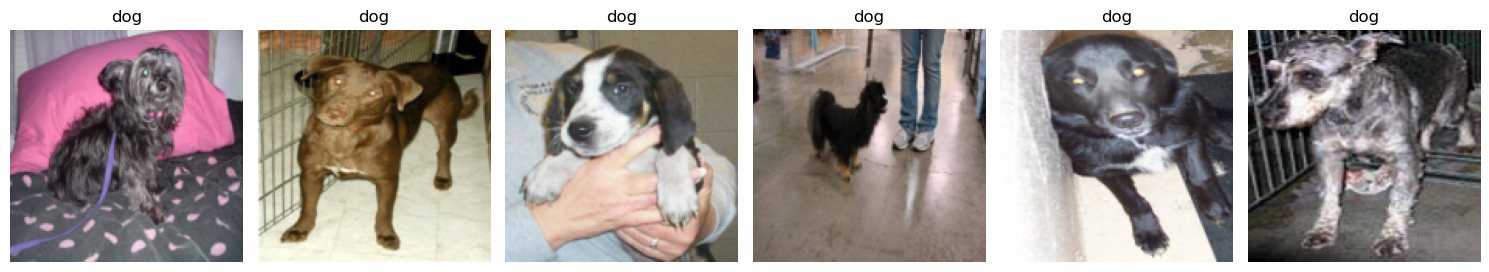

In [28]:
dog_folder_path = r"D:\DeepLearning\Cat vs Dog classification\train\dogs"
display_images_with_labels(dog_folder_path, num_images=6, size=(150, 150))

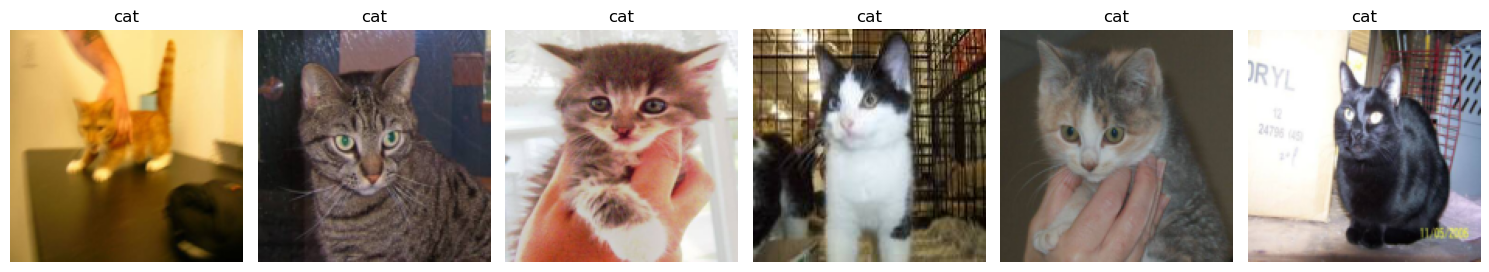

In [29]:
cats_folder_path = r"D:\DeepLearning\Cat vs Dog classification\train\cats"
display_images_with_labels(cats_folder_path, num_images=6, size=(150, 150))

## Data Training and Evaluation

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [31]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [32]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [33]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [34]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [38]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/DeepLearning/Cat vs Dog classification/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/DeepLearning/Cat vs Dog classification/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [41]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [44]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 690s 1s/step - accuracy: 0.8566 - loss: 0.3185 - val_accuracy: 0.9290 - val_loss: 0.1727
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 897ms/step - accuracy: 0.9446 - loss: 0.1445 - val_accuracy: 0.9428 - val_loss: 0.1419
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 599s 959ms/step - accuracy: 0.9622 - loss: 0.1021 - val_accuracy: 0.9484 - val_loss: 0.1291
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 554s 887ms/step - accuracy: 0.9739 - loss: 0.0726 - val_accuracy: 0.9430 - val_loss: 0.1470
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 553s 884ms/step - accuracy: 0.9839 - loss: 0.0504 - val_accuracy: 0.9460 - val_loss: 0.1478
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 551s 881ms/step - accuracy: 0.9898 - loss: 0.0360 - val_accuracy: 0.9482 - val_loss: 0.1400
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 550s 880ms/step - accuracy: 0.9941 - loss: 0.0226 - val_accuracy: 0.9334 - val_loss: 0.2135
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 549s 879ms/step - accuracy: 0.9963 - lo

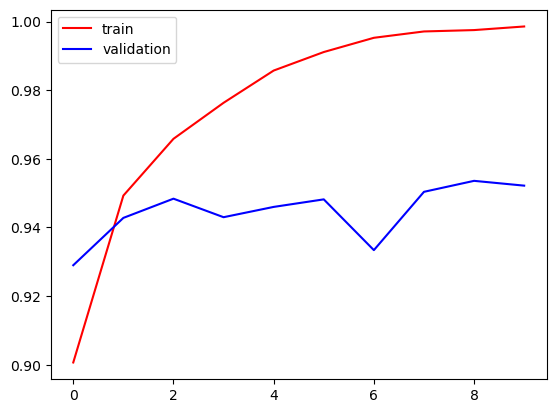

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

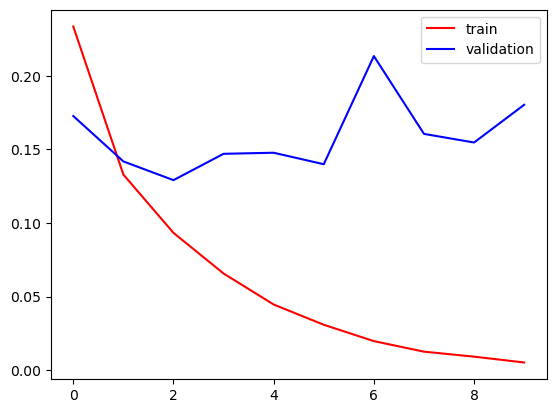

In [46]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()